# Create old WSRT primary beam image

In [22]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits as fits_astro
import apercal.libs.lib as lib

fits = lib.miriad('fits')
linmos = lib.miriad('linmos')

mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
mpl.rcParams['font.size'] = '20'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [13]:
hdulist = fits_astro.open('/tank/denes/drift_scan/WSRT_beam/image_mf_02.fits')
d = hdulist[0].data
print(d.shape)
d2 = np.ones(shape = (1, 1, 3073, 3073))
print(d2.shape)
hdulist[0].data = d2
hdulist.writeto('/tank/denes/drift_scan/WSRT_beam/beam.fits', overwrite=True)

(1, 1, 3073, 3073)
(1, 1, 3073, 3073)


In [14]:
# convert files to miriad:

fits.in_ = '/tank/denes/drift_scan/WSRT_beam/beam.fits'
fits.out = '/tank/denes/drift_scan/WSRT_beam/beam.mir'
fits.op = 'xyin'
fits.go()

['',
 'fits: Revision 1.33, 2018/12/04 04:02:11 UTC',
 '',
 'There were no blanked pixels in the input']

In [15]:
# aply linmos to an image filled with 1s

linmos.in_ = '/tank/denes/drift_scan/WSRT_beam/beam.mir'
linmos.out = '/tank/denes/drift_scan/WSRT_beam/wsrt_beam.mir'
linmos.go()

['',
 'linmos: Revision 1.33, 2018/11/29 23:30:11 UTC',
 '',
 'WARNING: Setting RMS to 1.0 for all images.',
 'Processing image /tank/denes/drift_scan/WSRT_beam/beam.mir']

In [16]:
# convert files to fits:

fits.in_ = '/tank/denes/drift_scan/WSRT_beam/wsrt_beam.mir'
fits.out = '/tank/denes/drift_scan/WSRT_beam/wsrt_beam.fits'
fits.op = 'xyout'
fits.go()

['', 'fits: Revision 1.33, 2018/12/04 04:02:11 UTC', '']

(3073, 3073)


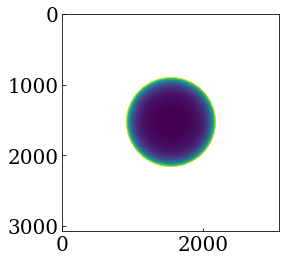

In [23]:
hdu = fits_astro.open('/tank/denes/drift_scan/WSRT_beam/wsrt_beam.fits')
beam = hdu[0].data

beam_0 = beam[0,0,:,:]
print(beam_0.shape)

plt.imshow(beam_0)

In [25]:
b = 0
date = '201028'

hdulist_regrid = fits_astro.open('/tank/denes/drift_scan/{}/cont/{}_{:02}_I_model_reg.fits'.format(date, date, b))
data_regrid = hdulist_regrid[0].data
header_regrid = hdulist_regrid[0].header

In [26]:
data_regrid.shape

(3073, 3073)

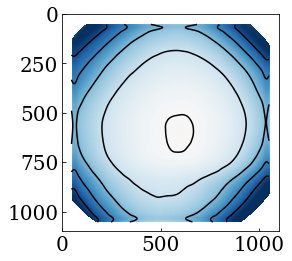

In [29]:

data2 = data_regrid*beam_0
data3 = data2[1000:2100,1000:2100]
plt.imshow(data3,  vmin=0.1, vmax=1.9, cmap='RdBu_r')
plt.contour(data3, levels=[0,0.2,.4,.60,.80, 1.0], colors='black')